In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
og_df = df
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
print(df.shape)

(891, 12)


In [3]:
df = df.loc[df['Age'] < 18]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [4]:
df = df.drop(['Ticket', 'Fare', 'Cabin', 'Name', 'PassengerId'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
7,0,3,male,2.0,3,1,S
9,1,2,female,14.0,1,0,C
10,1,3,female,4.0,1,1,S
14,0,3,female,14.0,0,0,S
16,0,3,male,2.0,4,1,Q
...,...,...,...,...,...,...,...
850,0,3,male,4.0,4,2,S
852,0,3,female,9.0,1,1,C
853,1,1,female,16.0,0,1,S
869,1,3,male,4.0,1,1,S


In [5]:
print(df.shape)

(113, 7)


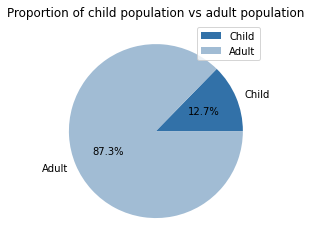

In [6]:
#child vs adult population
child = df.shape[0]/og_df.shape[0] * 100
adult = (og_df.shape[0] - df.shape[0])/og_df.shape[0] * 100
y = np.array([child, adult])
plt.pie(y, labels=['Child', 'Adult'], autopct='%1.1f%%', colors = ['#3271a8', '#a1bcd4'])
plt.legend()
plt.title('Proportion of child population vs adult population')
plt.show()

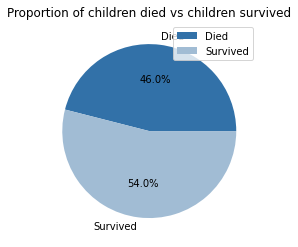

In [7]:
#death vs survived
df_child_died = df.loc[df['Survived'] == 0]
df_child_survived = df.loc[df['Survived'] == 1]
child_died = df_child_died.shape[0]/df.shape[0] * 100
child_survived = df_child_survived.shape[0]/df.shape[0] * 100

y = np.array([child_died, child_survived])
plt.pie(y, labels=['Died', 'Survived'], autopct='%1.1f%%', colors = ['#3271a8', '#a1bcd4'])
plt.legend()
plt.title('Proportion of children died vs children survived')
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Count'>

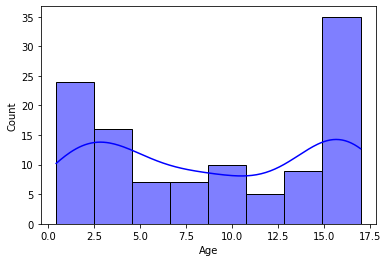

In [8]:
#age distribution
import seaborn as sns

age = df['Age']
sns.histplot(data=age, kde=True, color='blue')

In [9]:
df['Age'].describe()

count    113.000000
mean       9.041327
std        6.030408
min        0.420000
25%        3.000000
50%        9.000000
75%       16.000000
max       17.000000
Name: Age, dtype: float64

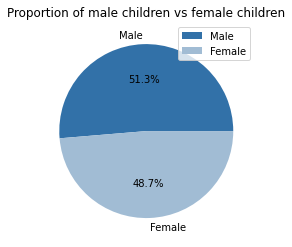

In [10]:
#sex distribution
df_male = df.loc[df['Sex'] == 'male']
df_female = df.loc[df['Sex'] == 'female']
male = df_male.shape[0]/df.shape[0] * 100
female = df_female.shape[0]/df.shape[0] * 100

y = np.array([male, female])
plt.pie(y, labels=['Male', 'Female'], autopct='%1.1f%%', colors = ['#3271a8', '#a1bcd4'])
plt.legend()
plt.title('Proportion of male children vs female children')
plt.show()

[Text(0, 0, '82'), Text(0, 0, '24'), Text(0, 0, '7')]

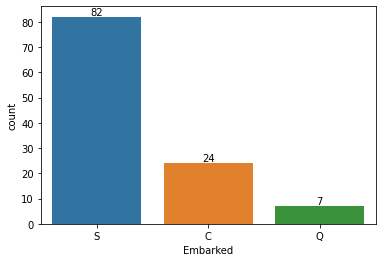

In [11]:
#port distribution
ax = sns.countplot(data=df, x='Embarked')
ax.bar_label(ax.containers[0])

<AxesSubplot: xlabel='FamilySize', ylabel='Count'>

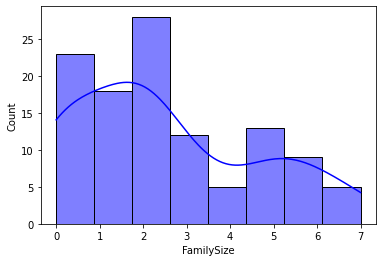

In [12]:
#family size distribution
df['FamilySize'] = df['SibSp'] + df['Parch']
sns.histplot(data=df['FamilySize'], kde=True, color='blue')

In [13]:
df['FamilySize'].describe()

count    113.000000
mean       2.513274
std        2.109143
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        7.000000
Name: FamilySize, dtype: float64

In [14]:
#Analyzing embarked vs survival
def generate_comparaison_plot(feature, hue_value):
    ax = sns.countplot(data=df,x=feature, hue=hue_value)
    feature_unique = df[feature].unique()
    proportions = df.groupby(feature)[hue_value].value_counts(normalize=True)
    hue_type = df[hue_value].dtype.type
    
    for container in ax.containers:
        labels = [f'{proportions.loc[g, hue_type(container.get_label())]:.1%}' for g in feature_unique]
        ax.bar_label(container, labels)

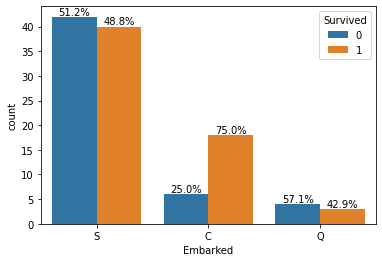

In [15]:
generate_comparaison_plot('Embarked', 'Survived')

In [17]:
df.groupby(['Survived', 'Embarked'])['Sex'].describe()
#df.sort_values(by=['Embarked', 'Sex', 'Survived']).head(50)

count unique     top freq
Survived Embarked                          
0        C            6      2  female    3
         Q            4      1    male    4
         S           42      2    male   28
1        C           18      2  female   14
         Q            3      1  female    3
         S           40      2  female   21

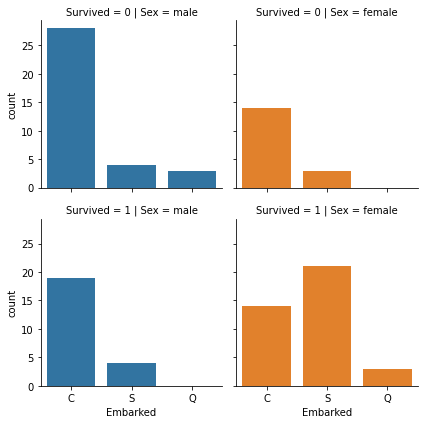

In [37]:
#ax = sns.FacetGrid(df, col='Survived', hue='Sex')
ax = sns.FacetGrid(df, row='Survived', col='Sex', hue='Sex')
ax.map_dataframe(sns.countplot, x='Embarked')

# ax = sns.FacetGrid(df, col='Survived')
# ax.map_dataframe(sns.countplot, x='Embarked', hue='Sex')
# ax.add_legend()

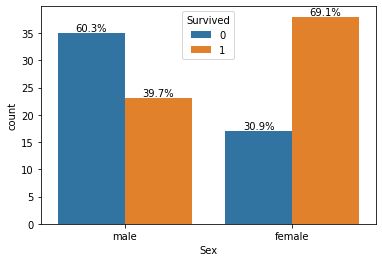

In [21]:
#Analyzing sex vs survival
generate_comparaison_plot('Sex', 'Survived')

In [36]:
df.groupby('Survived')['Sex'].describe()

,count,unique,top,freq
Survived,,,,
0,52,2,male,35
1,61,2,female,38


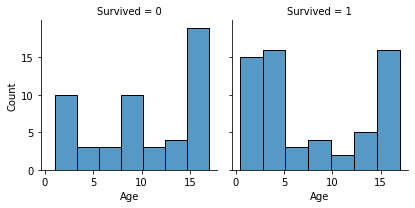

In [24]:
ax = sns.FacetGrid(df, col='Survived')
ax.map_dataframe(sns.histplot, x='Age')

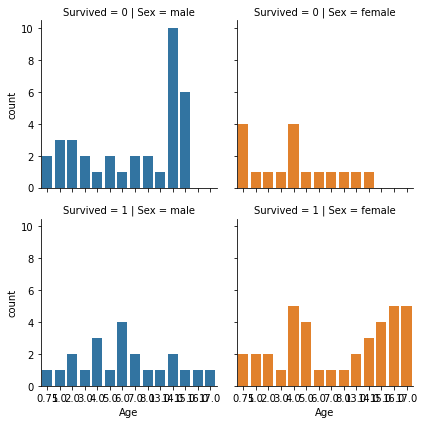

In [38]:
ax = sns.FacetGrid(df, row='Survived', col='Sex', hue='Sex')
ax.map_dataframe(sns.countplot, x='Age')

In [35]:
# age_survived = df[['Age', 'Survived']]
# age_survived = age_survived.loc[age_survived['Survived'] == 1]
# age_survived['Age'].describe()

# age_died = df[['Age', 'Survived']]
# age_died = age_died.loc[age_died['Survived'] == 0]
# age_died['Age'].describe()
df.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,52.0,10.394231,5.674450,1.00,5.5,10.5,16.0,17.0
1,61.0,7.888033,6.129831,0.42,3.0,5.0,15.0,17.0


In [39]:
df.groupby(['Survived', 'Sex'])['Age'].describe()

count       mean       std   min  25%   50%    75%   max
Survived Sex                                                             
0        female   17.0   8.441176  5.061751  2.00  3.0   9.0  11.00  17.0
         male     35.0  11.342857  5.780000  1.00  7.0  14.0  16.00  17.0
1        female   38.0   9.592105  6.159595  0.75  4.0  10.5  15.75  17.0
         male     23.0   5.072609  5.036360  0.42  1.0   3.0   8.50  17.0

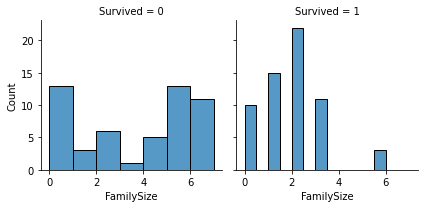

In [38]:
ax = sns.FacetGrid(df, col='Survived')
ax.map_dataframe(sns.histplot, x='FamilySize')

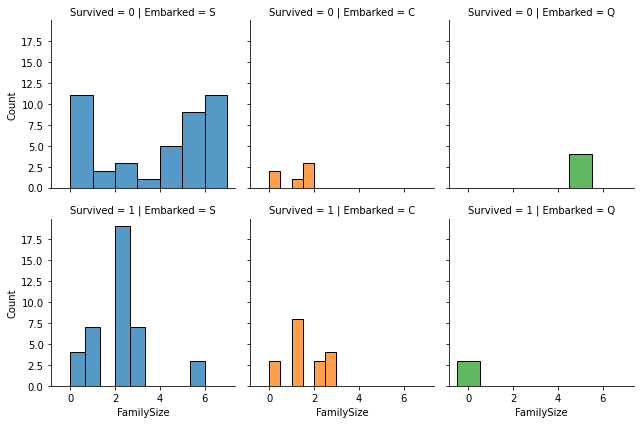

In [41]:
ax = sns.FacetGrid(df, row='Survived', col='Embarked', hue='Embarked')
ax.map_dataframe(sns.histplot, x='FamilySize')

In [39]:
df.groupby('Survived')['FamilySize'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,52.0,3.346154,2.503994,0.0,0.75,4.0,5.0,7.0
1,61.0,1.803279,1.364059,0.0,1.00,2.0,2.0,6.0


In [42]:
df.groupby(['Survived', 'Embarked'])['FamilySize'].describe()

count      mean       std  min   25%  50%   75%  max
Survived Embarked                                                      
0        C           6.0  1.166667  0.983192  0.0  0.25  1.5  2.00  2.0
         Q           4.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0
         S          42.0  3.500000  2.587493  0.0  0.25  4.0  5.75  7.0
1        C          18.0  1.444444  1.041618  0.0  1.00  1.0  2.00  3.0
         Q           3.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
         S          40.0  2.100000  1.410583  0.0  1.00  2.0  2.25  6.0